# Creating a K-means clusterig model to find the fault classes in a PV installation

Importing Modules

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

Reading data

In [6]:
df=pd.read_excel('K3.xlsx')
df.head()

,G,P
0,0.008667,0.018119
1,0.164500,0.369489
2,0.717500,1.601420
3,0.902167,1.973920
4,1.086000,2.448440


plotting relatioship between the variables

Text(0, 0.5, 'power')

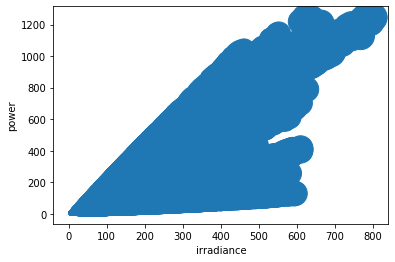

In [7]:
plt.scatter(df.G,df.P,df.T)
plt.xlabel('irradiance',)
plt.ylabel('power')

Creating the cluster

In [8]:
km=KMeans(n_clusters=10)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

predicting cluster values

In [9]:
y_pred=km.fit_predict(df)
y_pred

array([9, 9, 9, ..., 9, 9, 9])

In [10]:
df['cluster']=y_pred
df.head()

,G,P,cluster
0,0.008667,0.018119,9
1,0.164500,0.369489,9
2,0.717500,1.601420,9
3,0.902167,1.973920,9
4,1.086000,2.448440,9


Plotting the cluster

Text(0, 0.5, 'P')

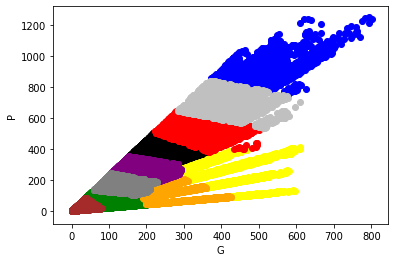

In [11]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
df3=df[df.cluster==3]
df4=df[df.cluster==4]
df5=df[df.cluster==5]
df6=df[df.cluster==6]
df7=df[df.cluster==7]
df8=df[df.cluster==8]
df9=df[df.cluster==9]
plt.scatter(df0.G,df0.P, color='g')
plt.scatter(df1.G,df1.P, color='black')
plt.scatter(df2.G,df2.P, color='blue')
plt.scatter(df3.G,df3.P, color='yellow')
plt.scatter(df4.G,df4.P, color='red')
plt.scatter(df5.G,df5.P, color='orange')
plt.scatter(df6.G,df6.P, color='purple')
plt.scatter(df7.G,df7.P, color='grey')
plt.scatter(df8.G,df8.P, color='silver')
plt.scatter(df9.G,df9.P, color='brown')

plt.xlabel('G')
plt.ylabel('P')

Carrying out Normalisation for more effiecient results

In [12]:
scaler= MinMaxScaler()
scaler.fit(df[['G']])
df[['G']]=scaler.transform(df[['G']])
scaler.fit(df[['P']])
df[['P']]=scaler.transform(df[['P']])
df.head()

,G,P,cluster
0,0.000011,0.000014,9
1,0.000205,0.000295,9
2,0.000896,0.001279,9
3,0.001126,0.001576,9
4,0.001356,0.001955,9


In [13]:
km=KMeans(n_clusters=10)
y_pred=km.fit_predict(df[['G','P']])
y_pred

array([3, 3, 3, ..., 3, 3, 3])

In [14]:
df['cluster']=y_pred

Text(0, 0.5, 'P')

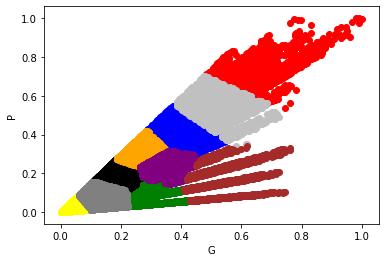

In [15]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
df3=df[df.cluster==3]
df4=df[df.cluster==4]
df5=df[df.cluster==5]
df6=df[df.cluster==6]
df7=df[df.cluster==7]
df8=df[df.cluster==8]
df9=df[df.cluster==9]
plt.scatter(df0.G,df0.P, color='g')
plt.scatter(df1.G,df1.P, color='black')
plt.scatter(df2.G,df2.P, color='blue')
plt.scatter(df3.G,df3.P, color='yellow')
plt.scatter(df4.G,df4.P, color='red')
plt.scatter(df5.G,df5.P, color='orange')
plt.scatter(df6.G,df6.P, color='purple')
plt.scatter(df7.G,df7.P, color='grey')
plt.scatter(df8.G,df8.P, color='silver')
plt.scatter(df9.G,df9.P, color='brown')

plt.xlabel('G')
plt.ylabel('P')

obtaining the centroids for each cluster

In [16]:
km.cluster_centers_

array([[0.30430989, 0.08932978],
       [0.18844983, 0.19584692],
       [0.39691419, 0.4049895 ],
       [0.02894928, 0.01804652],
       [0.65889798, 0.72355223],
       [0.25334213, 0.31421356],
       [0.34469012, 0.22798807],
       [0.13683015, 0.07535338],
       [0.52362854, 0.52766644],
       [0.51144869, 0.15845383]])

Text(0, 0.5, 'P')

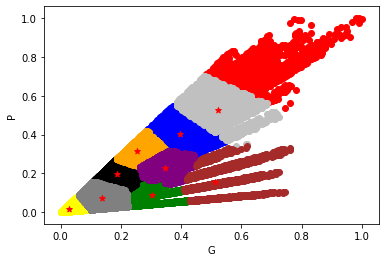

In [17]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
df3=df[df.cluster==3]
df4=df[df.cluster==4]
df5=df[df.cluster==5]
df6=df[df.cluster==6]
df7=df[df.cluster==7]
df8=df[df.cluster==8]
df9=df[df.cluster==9]
plt.scatter(df0.G,df0.P, color='g')
plt.scatter(df1.G,df1.P, color='black')
plt.scatter(df2.G,df2.P, color='blue')
plt.scatter(df3.G,df3.P, color='yellow')
plt.scatter(df4.G,df4.P, color='red')
plt.scatter(df5.G,df5.P, color='orange')
plt.scatter(df6.G,df6.P, color='purple')
plt.scatter(df7.G,df7.P, color='grey')
plt.scatter(df8.G,df8.P, color='silver')
plt.scatter(df9.G,df9.P, color='brown')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='r', marker='*')

plt.xlabel('G')
plt.ylabel('P')

Implementing a the elbow technique to find the optimal K value

In [87]:
k_range=range(1,11)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['G','P']])
    sse.append(km.inertia_)

In [88]:
sse

[3216.8677071340853,
 1379.5519416596203,
 797.030011582166,
 604.3581347925283,
 445.52330297929876,
 344.83636790431785,
 296.0863224365731,
 248.50474148026606,
 219.40283562191522,
 199.49634184956554]

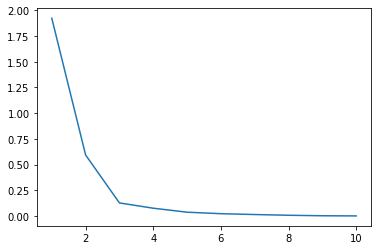

In [24]:
plt.plot(k_range,sse)

Fitting the model with the new K value as 3

In [92]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['G','P']])

In [93]:
df['cluster']=y_pred

Text(0, 0.5, 'P')

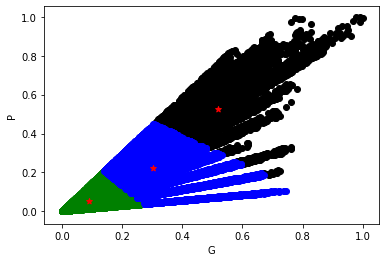

In [95]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

plt.scatter(df0.G,df0.P, color='g')
plt.scatter(df1.G,df1.P, color='black')
plt.scatter(df2.G,df2.P, color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='r', marker='*')

plt.xlabel('G')
plt.ylabel('P')